# 🐶 End-to-end Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.


And the result? An impressive dog breed classifier was built that not only showcases the power of AI but also provides invaluable insights into the ever-evolving field of machine learning. Join us as we uncover the journey, share our learnings, and unveil the exciting possibilities that artificial intelligence holds for the future

## 1. Problem definition

This problem focuses on identifying the breed of a dog given no further information other than an image of the dog.

For example, when i'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from the Kaggle's dog breed identification competition. [Kaggle datalink](https://www.kaggle.com/competitions/dog-breed-identification/data)

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image. [Kaggle evaluation](https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation)

## 4. Features

Some further information about the data:
* Since we are dealing with images (unstructured data) it's probably best we use deep learning/transfer learning.
* There are 120 total breeds of dogs in the dataset (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels because we'll want to predict them).

In [ ]:
# Unzip the uploaded data into google drive
#!unzip 'drive/MyDrive/Dog Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Dog Vision/'

### Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we are using a GPU ✅

In [ ]:
# Import necessary tools.
import tensorflow as tf
import tensorflow_hub as hub
print('TF version:', tf.__version__)
print('TF Hub version:', hub.__version__)

# Check for GPU availability
print('GPU', 'available (YESSSSSS!!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')

TF version: 2.13.0
TF Hub version: 0.14.0
GPU available (YESSSSSS!!!!!!)


## Getting our data ready (turning into tensors)

With machine learning models, we need to use numbers to work with our data. So, our first task is to convert our images into numerical forms, which we call 'Tensors.'

Now, let's begin by getting our data and taking a look at the labels.

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv('drive/MyDrive/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# To mount drive using code
# from google.colab import drive
# drive.mount('/content/drive')

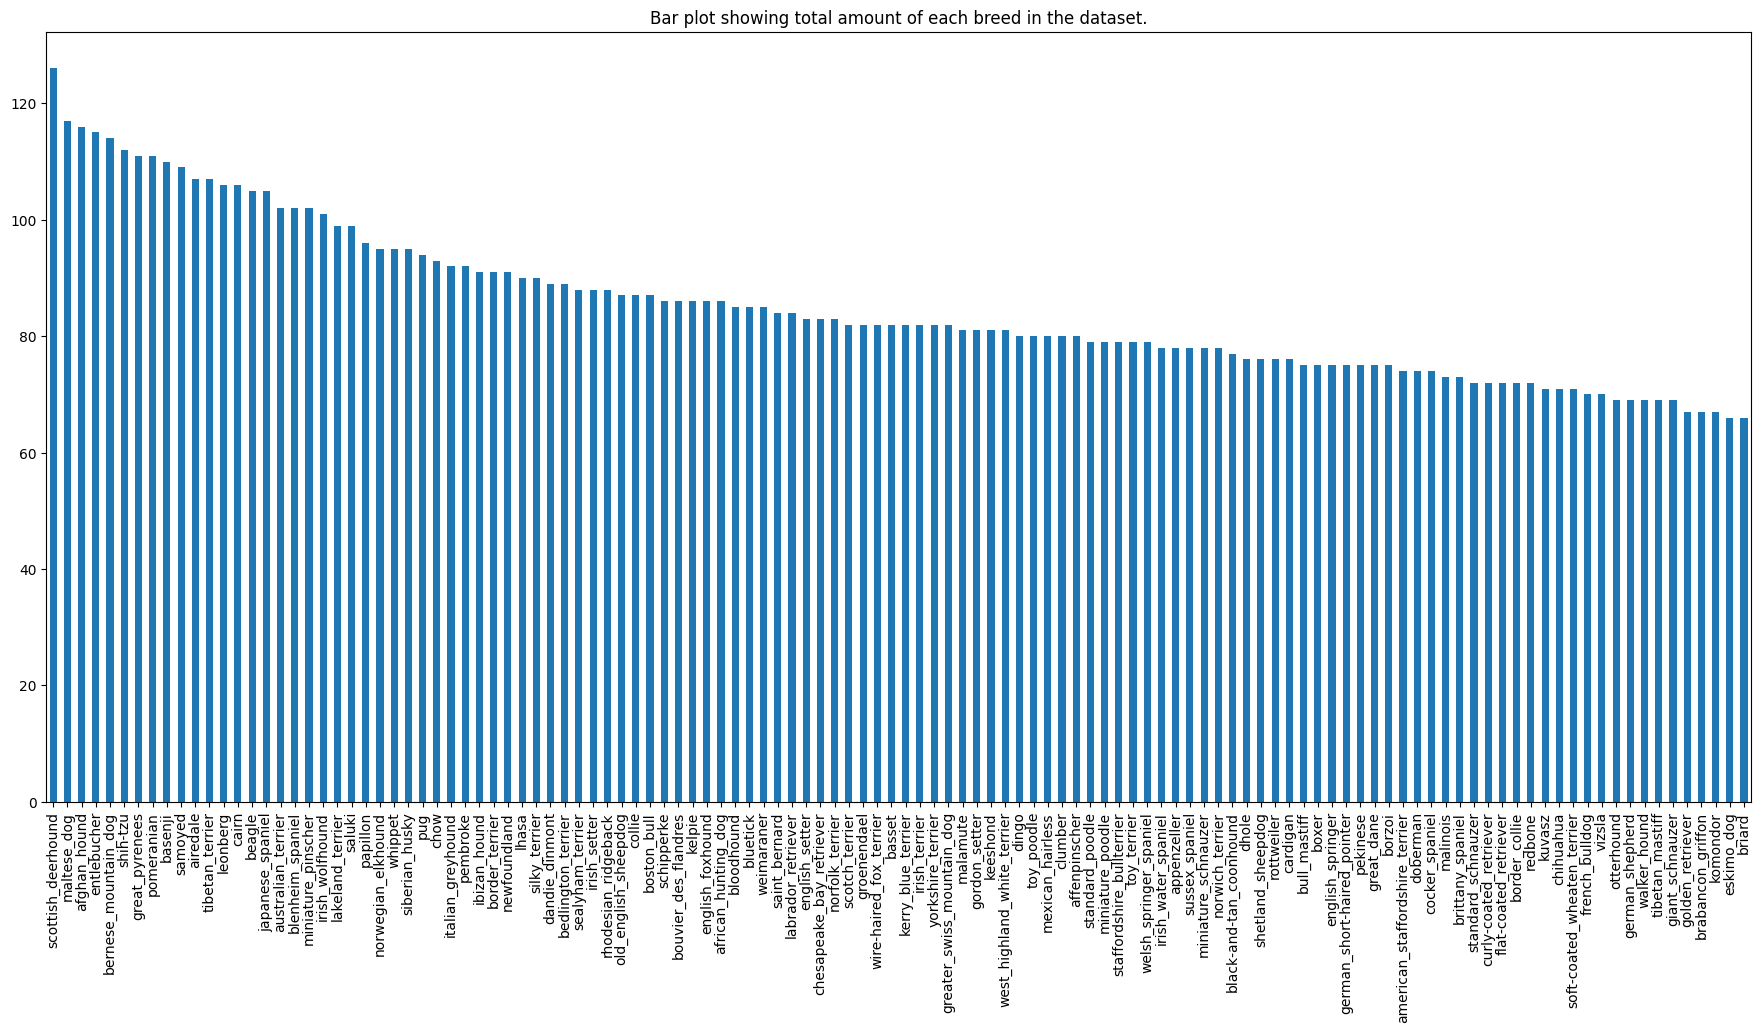

In [ ]:
# Checkow many images are there of each breed.
labels_csv['breed'].value_counts().plot.bar(figsize=(22, 10),title="Bar plot showing total amount of each breed in the dataset.");

In [ ]:
# Check median value of count of each breeds.
labels_csv['breed'].value_counts().median()

82.0

In [ ]:
# To install Ipython for displaying images from the file directory links.
#!pip install Ipython

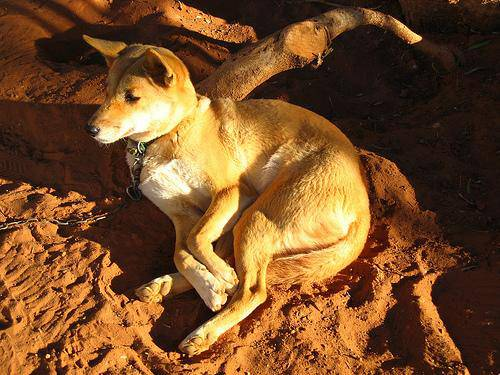

In [ ]:
# Let's view any of the images
from IPython.display import Image
Image('drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [ ]:
#Look at first five labels
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Getting images and thier labels

Let's get a list of all of our image file pathnames.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


The csv file, `labels.csv` contains two columns which is the `id` and the corresponding `breed`. The folder `train` contains the actual images of the dogs. The length of the csv file and the `train` folder are the same but the `train` folder doesn't exactly arrange in the same order as the csv file. To fix this, we iterate through the csv file `id` column and create the path to the `train` folder directly. This way we can access the image directly with the direct corresponding label for training of the model.

In [ ]:
# Create pathnames from image ID's using a for loop.
filenames = ['drive/MyDrive/Dog Vision/train/' + fname + '.jpg' for fname in labels_csv['id']]

# Check first 10 values.
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir('drive/MyDrive/Dog Vision/train') # Displays all the data in the folder in list format.

['e343d8cb8acee3f75ad304a68ec68d6a.jpg',
 'de51f05ddadfb52e97fbc8799891ea8c.jpg',
 'e75f2316c5dd47b87a22bbe95cf8b8da.jpg',
 'dc44465b8caedd8d06f52a7482036a02.jpg',
 'e53b517c2d19cc71b91546deb4013864.jpg',
 'e5ec89512b1aa4594fffa72867874a27.jpg',
 'dd28cda8dfc9a97642d3333722a520af.jpg',
 'e681969d4b5b730e9c93ce5e9d9ec9ff.jpg',
 'e67eb5ac576a272a62033127bf4e6570.jpg',
 'dd694fe7f5b46a6dd7c545d31004e1f6.jpg',
 'e0e54245b5dc9d5f66cb1012bae1a10c.jpg',
 'e78fc6d10f9d4646a50004e4ac74ea5c.jpg',
 'e90868c5948296e603f26b2d2696f9c7.jpg',
 'de9c66567290fc6574e102d21dc3a957.jpg',
 'e4a669bdb348065f7760d43fa3efa731.jpg',
 'e79cc376c53b8333546437ca6e5b8759.jpg',
 'e6cdf82e11fd0ee6f73c55c0b4944616.jpg',
 'ddde7d44c5c478092358387baee20cfb.jpg',
 'ddf23184178185362a7f99031328aae8.jpg',
 'ddcaf8e4f88b5c86a622cd62cfadfd5f.jpg',
 'e05e54a99b170e04cd266a8e90aedb1e.jpg',
 'e4e3868ac4ef2dae776dcb129e152e5f.jpg',
 'e89b8245a8e0dec55c3e6aca21e9b374.jpg',
 'e505e918813f8b9e076307e6b884064c.jpg',
 'e96a5909f47824

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/Dog Vision/train')) == len(filenames):
  print('Filenames matches actual amount of files!!!! Proceed.')
else:
  print('Filenames do not match actual amount of files, check the target directory.')

Filenames matches actual amount of files!!!! Proceed.


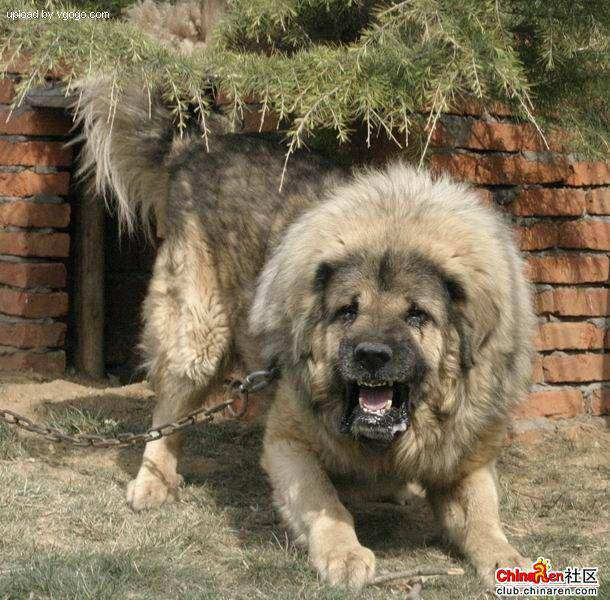

In [ ]:
# More check
Image(filenames[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

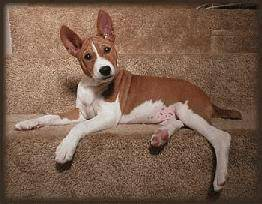

In [ ]:
# One more check
Image(filenames[750])

In [ ]:
labels_csv['breed'][750]

'basenji'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv['breed']
labels = np.array(labels)


# OR second method
# labels = labels.csv['breed].to_numpy()

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
filenames

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dog Vision/train/006cc3ddb9dc1bd827479569fcdc52d

In [ ]:
# Confirm if number of labels matches number of filenames.
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames.')
else:
  print('Number of labels does not match number of filenames, check data directories!')

Number of labels matches number of filenames.


In [ ]:
# Get all the unique label values.
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [ ]:
labels[0]

'boston_bull'

In [ ]:
# Turn a single label into an array of booleans.
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(labels)

10222

In [ ]:
# Turn every label into a boolean array.
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

### Creating our own validation set
Since the data from kaggle doesn't come with a validation set, we're going to create our own. This way we can both train and validate our model simultaneously before testing occurs.

In [ ]:
# Setup X and y variables
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split
# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(y_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data!
X_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing images (turning images into tensors)
To preprocess our images into Tensors, we're going to write a function which does a few things:
1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpg) into Tensors.
4. Resize the `image` to be a shape of (224, 224).
5. Return the modified `image`.

This is done to ensure all the images match the input form in which our machine learning model takes.

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpg) into Tensors.
4. Normalize our image (convert color channel values from  0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224).
6. Return the modified `image`.

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=[IMG_SIZE, IMG_SIZE]):
  '''
  Takes an image file path and turns the image into a Tensor.
  '''

  # Read in an image file
  image = tf.io.read_file(image_path) # Returns a tensor image with the entire contents of the input filename.
  image = tf.image.decode_jpeg(image, channels=3) # Turn the jpeg image into numerical Tensors with 3 color channels (Red, Green, Blue)
  image = tf.image.convert_image_dtype(image, tf.float32)  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) # Resize the image to our desired values (224, 224)

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go, they all might not fit into memory.

So that is why we do about 32 (this is batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which looks like this:
`(image, label)` .

In [ ]:
# Create a simple function to return a tuple of tensors (image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  '''
  image = process_image(image_path)
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (X & y) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''
  # If the data is a test dataset, we probably don't have lables.
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths no labels  #This gives us slices of the tensor in form of objeect
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    print('Test data created successfully.')
    return data_batch

  # If a data is a valid dataset, we don't need to shuffle it.
  elif valid_data:
    print('Creating validation data batches...')
    # Turns filepaths and labels into Tensors and matches each image tensor with it's corresponding label as a list.
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepaths
                                               tf.constant(y))) # Labels
    # Takes the list of Tensor and label, maps it with the `get_image_label` function to get both values in tuple form.
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    print('Validation data created successfully.')
    return data_batch

  else:
    print('Creating training data batches...')

    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    print('Training data created successfully.')
    return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Training data created successfully.
Creating validation data batches...
Validation data created successfully.


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Check the different attributes of our data batches (height, width, color_channel, dtype, name)
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  '''
  Displays a plot of 25 images and thier labels from a data batch.
  '''
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns, index of current plot)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.22947891, 0.15373486, 0.17106679],
          [0.19127809, 0.12558235, 0.12359671],
          [0.23470998, 0.18874653, 0.15325747],
          ...,
          [0.42246827, 0.388287  , 0.35034934],
          [0.41759673, 0.3486555 , 0.28972542],
          [0.35712498, 0.28261518, 0.21594852]],
 
         [[0.30098322, 0.27392614, 0.2500634 ],
          [0.20880118, 0.1916555 , 0.14665796],
          [0.1596255 , 0.15601382, 0.07715166],
          ...,
          [0.3019548 , 0.27854967, 0.22345   ],
          [0.39738852, 0.33744866, 0.2623436 ],
          [0.42144927, 0.35478258, 0.2763512 ]],
 
         [[0.1381554 , 0.1728718 , 0.09672916],
          [0.11493036, 0.14550634, 0.05517528],
          [0.09901932, 0.13630049, 0.01602166],
          ...,
          [0.08705454, 0.06971684, 0.02610658],
          [0.30554888, 0.25528264, 0.17293142],
          [0.47521028, 0.4139183 , 0.33279955]],
 
         ...,
 
         [[0.29023987, 0.2782198 , 0.22125502],
          [0.22258

In [ ]:
len(train_images), len(train_labels)

(32, 32)

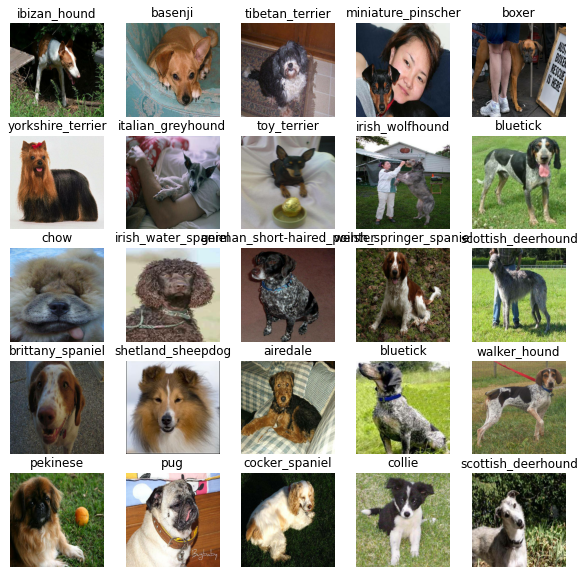

In [ ]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator()) # Next Returns the next item in an iterator.
show_25_images(train_images, train_labels)

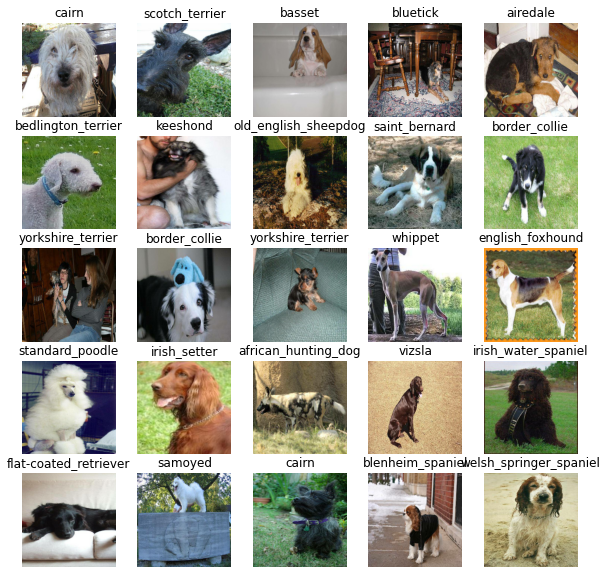

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

Before we build a model, there a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - [Tensorflowhub model](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model.
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: [Guide](https://www.tensorflow.org/guide/keras/overview)


In [ ]:
# Create a function which builds a Keras model.
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  '''
  Builds a model from the model URL with the inputs and output shapes.
  '''
  print('Building model with:', MODEL_URL)

  # setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation='softmax') # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save it's progress, check it's progress or stop training if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our model's progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension. ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.  ✅
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training). ✅

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create log directory for storing TensorBoard logs
  logdir = os.path.join('drive/My Drive/Dog Vision/logs',
                        # Make it so the logs get tracked whenever we run an experiment.
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

[Earlystopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on a subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}


In [ ]:
# Check to make sure we're still running on a GPU
print('GPU',  'available (YESSSSS!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')

GPU available (YESSSSS!!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Create the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  '''
  Trains a given model and returns the trained verison.
  '''
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model.
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return fitted model
  return model


In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 7s 126ms/step - loss: 4.5166 - accuracy: 0.1138 - val_loss: 3.5164 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 3s 130ms/step - loss: 1.6204 - accuracy: 0.6775 - val_loss: 2.2319 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 4s 141ms/step - loss: 0.5558 - accuracy: 0.9450 - val_loss: 1.7234 - val_accuracy: 0.6200
Epoch 4/100
25/25 [==============================] - 3s 124ms/step - loss: 0.2465 - accuracy: 0.9900 - val_loss: 1.5530 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 5s 183ms/step - loss: 0.1445 - accuracy: 0.9950 - val_loss: 1.4770 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 5s 195ms/step - loss: 0.0991 - accuracy: 1.0000 - val_loss: 1.4343 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, What are some ways to prevent model overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good thing! It means our model is learning!!!!

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directly we created earlier and visualize its contents.

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 45s 97ms/step


array([[1.73531380e-03, 1.39712647e-04, 5.89789532e-04, ...,
        7.96687556e-04, 7.22134646e-05, 4.66535240e-03],
       [1.93994376e-03, 1.16062642e-04, 1.98942851e-02, ...,
        1.31954162e-04, 8.02194409e-04, 3.15084872e-05],
       [5.11294747e-05, 1.15567551e-03, 2.78267136e-04, ...,
        3.55974800e-04, 7.64889628e-05, 2.22344665e-04],
       ...,
       [9.70211295e-06, 1.11935755e-04, 1.25439605e-04, ...,
        7.92897554e-05, 5.65980503e-04, 3.69933732e-05],
       [1.20017689e-03, 3.65697255e-04, 1.18228163e-04, ...,
        5.83780093e-05, 7.94926600e-05, 8.64720903e-03],
       [1.28012581e-03, 1.47740342e-04, 1.71266706e-03, ...,
        1.29988985e-02, 6.43198960e-04, 4.37590134e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breeds)

120

In [ ]:
predictions[0]

array([7.75407651e-04, 1.26442828e-04, 4.43311466e-04, 5.72910976e-05,
       2.25878593e-05, 1.13486540e-05, 2.26024985e-02, 3.40836123e-04,
       1.31351277e-04, 3.46718309e-03, 8.41309811e-05, 3.24814609e-04,
       2.09460741e-05, 3.84408741e-05, 2.61215377e-04, 2.31299447e-04,
       3.38067148e-05, 1.73557654e-01, 8.26230735e-06, 5.27729662e-06,
       7.44476565e-04, 5.71542332e-05, 5.68800206e-05, 5.20313624e-04,
       1.20526849e-04, 1.20610384e-04, 3.42235267e-01, 9.42820043e-05,
       3.16392252e-04, 1.95848668e-04, 3.01638684e-05, 1.01036893e-03,
       3.95141629e-04, 4.02202932e-06, 4.63436954e-05, 2.70833280e-02,
       1.69557097e-05, 4.57710667e-05, 6.22290027e-05, 2.27271419e-04,
       7.32998451e-05, 1.36519193e-05, 2.86697934e-04, 3.65785309e-05,
       7.65798904e-06, 1.09615052e-04, 2.99851126e-06, 6.26925466e-05,
       9.06767382e-04, 7.09031156e-05, 1.76653222e-04, 1.01896992e-04,
       3.33698496e-04, 7.96963941e-05, 2.70354449e-05, 1.11523288e-04,
      

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f'Max value (probability of prediction: {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[9.70787587e-05 1.01707490e-04 2.10061698e-04 2.36066553e-05
 4.15797206e-03 3.62155333e-05 1.32847108e-05 1.71579351e-03
 1.17208632e-02 7.69847333e-02 4.06972176e-05 1.01101095e-05
 6.59970916e-04 9.33278631e-03 1.54521014e-03 1.40738785e-02
 2.91695178e-05 5.61115099e-04 3.03451263e-04 2.52755854e-04
 5.40025831e-05 5.77007362e-04 3.96765936e-05 3.94088129e-05
 1.88219361e-02 1.02860657e-04 1.38596428e-04 1.38232237e-04
 2.50978535e-03 7.38103918e-05 1.10094486e-04 9.74376089e-05
 1.36787086e-04 1.56188144e-05 4.94630149e-05 3.29237155e-05
 4.79883631e-04 4.66033322e-04 8.44892056e-05 3.57863635e-01
 8.20790301e-05 3.57167191e-05 5.73380059e-03 5.43751048e-06
 4.45890939e-04 1.63619152e-05 1.34658068e-04 4.34631191e-04
 3.97277072e-05 3.72743496e-04 2.78791500e-04 7.01709068e-05
 6.64184277e-04 3.07990145e-03 1.27877393e-05 4.42351593e-04
 6.42935571e-04 1.65692996e-04 2.78010921e-05 3.02126700e-05
 5.94305020e-05 2.70061224e-04 2.70044848e-06 4.22515077e-05
 6.17504556e-05 8.730404

Having the above functionality is great but we want to  be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on:

**Note:** Prediction probabilities are also known as confidence levels.


In [ ]:
# Turn prediction probabilities into thier respective label (easier to understand).
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of prediction probaibilites into a label.
  '''
  return unique_breeds[np.argmax(prediction_probabilities)]


# Get a predicted label based on an array of prediction probabilities.
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  '''
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels.
  '''
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
images_ = []
labels_ = []
# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels.
* Validation labels (Truth label).
* Validation images.

Let's make some function to make these all a bit more visual.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted labe, it's predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction ground truth and an image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks.
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change color of the title depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label.
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

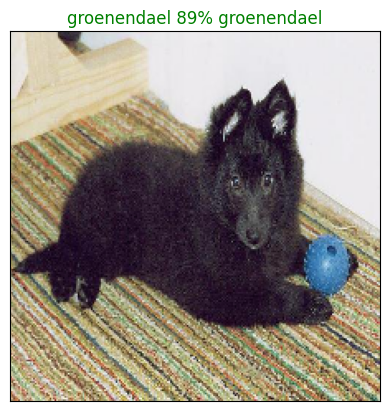

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our model's top prediction, let's make another function to view our model's top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find the prediction using `get_pred_label`.
* Find the top 10:
  * Predictions probabilities indexes.
  * Prediction probabilities values.
  * Prediction labels.
* Plot the top 10 prediction probability values and labels, coloring the true labels green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  '''
  Plots the top 10 highest prediction confidences along with the truth label for sample n.
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

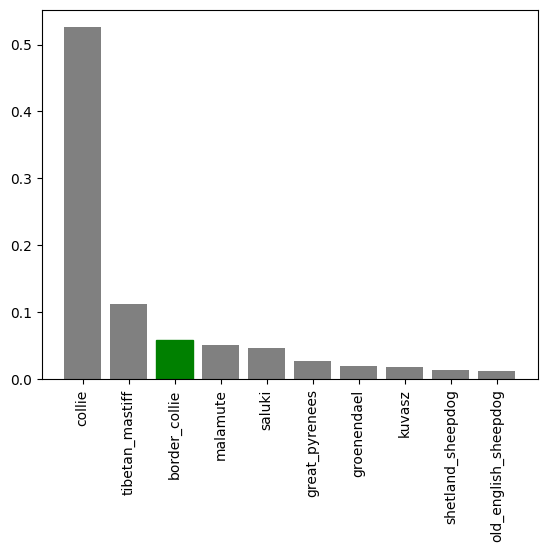

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visualuize our prediction and evaluate our model, let's check out a few.

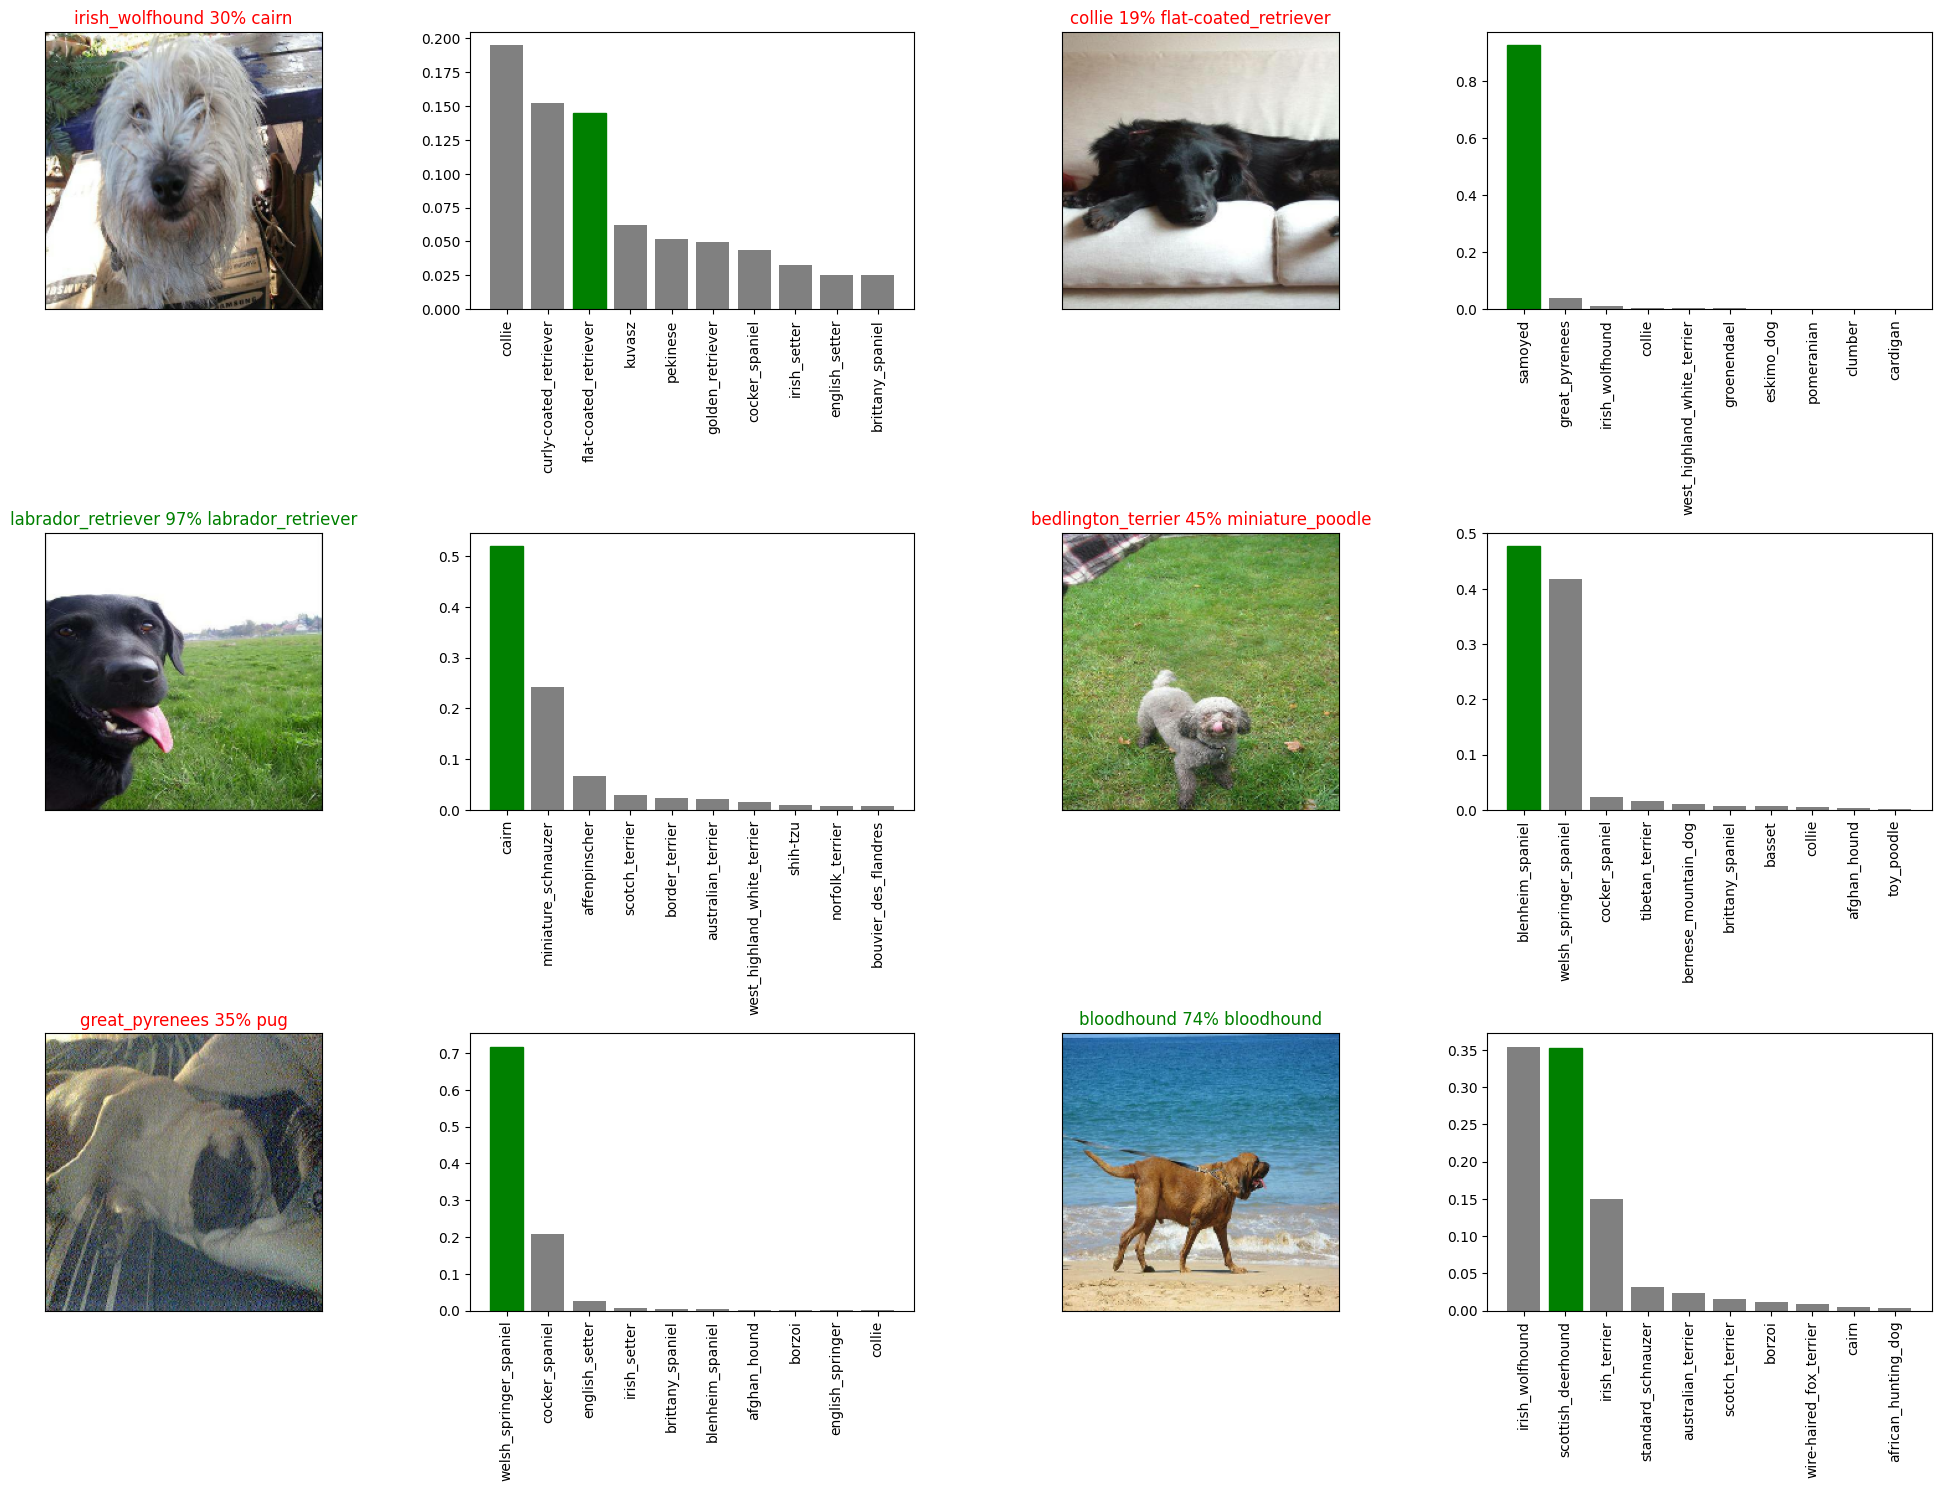

In [ ]:
# Let's check out a few predictions and thier different values.
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i*i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [ ]:
# Create a function to save a model
import datetime
def save_model(model, suffix=None):
  '''
  Save a given model in a model's directory and append a suffix(string)
  '''
  # Create a model diretory pathname with current time.
  modeldir = os.path.join('drive/MyDrive/Dog Vision/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' + suffix + '.h5' # Save format of a model.
  print(f'Saving model to: {model_path}...........')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specified path.
  '''
  print(f'Loading saved model from : {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer':hub.KerasLayer})
  return model


Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
#save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to: drive/MyDrive/Dog Vision/models/20230929-14121695996766-1000-images-mobilenetv2-Adam.h5...........


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog Vision/models/20230929-14121695996766-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('drive/MyDrive/Dog Vision/models/20230324-12581679662680-1000-images-mobilenetv2-Adam.h5')

Loading saved model from : drive/MyDrive/Dog Vision/models/20230324-12581679662680-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 74ms/step - loss: 1.3233 - accuracy: 0.6700


[1.3233267068862915, 0.6700000166893005]

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.2459 - accuracy: 0.6950


[1.2458974123001099, 0.6949999928474426]

## Training a big dog model 🐶(on the full data)

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...
Training data created successfully.


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model with the full data
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data so we can't monitor the validation accuracy.
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience= 3)


**Note:** Running the cell below will take a little while (up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# fit the model to the full data
# full_model.fit(x=full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
# save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/MyDrive/Dog Vision/models/20230324-14231679667791-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from : drive/MyDrive/Dog Vision/models/20230324-14231679667791-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily, we created `create_data_batches` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll

  * Get the test image filenames. ✅
  * Convert the filenames into test data batches using `create_data_batches`   and setting the `test_data` parameter to `True` (since the test data doesn't have labels). ✅
  * Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = 'drive/MyDrive/Dog Vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e63a126acd70223f2d388702843d185b.jpg',
 'drive/MyDrive/Dog Vision/test/e2ef94a22af1d5375132de4eb19d2a64.jpg',
 'drive/MyDrive/Dog Vision/test/e57a2bee790b512b2ba824b26f3f93fd.jpg',
 'drive/MyDrive/Dog Vision/test/e2b6d4957b62934bd831c3a1b65e2ebb.jpg',
 'drive/MyDrive/Dog Vision/test/e49bfa1dc9bc6fa7464b29507725b3af.jpg',
 'drive/MyDrive/Dog Vision/test/dfac7db18136057f5d1730c0055f875c.jpg',
 'drive/MyDrive/Dog Vision/test/e60f6620bf8751538db9006d425f1b45.jpg',
 'drive/MyDrive/Dog Vision/test/e743bea73da2c0dab99ccdbc697b1ac8.jpg',
 'drive/MyDrive/Dog Vision/test/e6da14858db7781843db6af91551f627.jpg',
 'drive/MyDrive/Dog Vision/test/e3f04efb648b110b2eb04b9c041504d8.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...
Test data created successfully.


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling `predict()` on the our full model and passing it the test data batch will take a long time to run (about a ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what it has learned in the training dataset.

In [ ]:
# Make predictions on the test data batch using the loaded full model
# test_predictions = loaded_full_model.predict(test_data,
#                                              verbose=1)


324/324 [==============================] - 4208s 13s/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
# np.savetxt('drive/MyDrive/Dog Vision/preds_array.csv', test_predictions, delimiter=',')

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt('drive/MyDrive/Dog Vision/preds_array.csv', delimiter=',')

In [ ]:
test_predictions[:10]

array([[1.33508031e-11, 6.77753098e-09, 5.15936391e-11, ...,
        1.22792540e-10, 2.97220859e-11, 7.91747362e-11],
       [1.04943920e-09, 5.25838428e-10, 9.14713583e-11, ...,
        2.80878414e-08, 1.22232143e-06, 1.96580920e-08],
       [1.32062597e-10, 2.10409953e-11, 1.68665404e-09, ...,
        5.88796319e-14, 5.04242698e-12, 1.49792678e-11],
       ...,
       [3.32293668e-14, 5.71763028e-14, 4.34325326e-10, ...,
        9.10088893e-09, 7.08276957e-08, 6.57235200e-09],
       [1.17431791e-05, 4.12105474e-05, 2.63510137e-05, ...,
        1.94557397e-05, 8.08337397e-09, 8.74840467e-08],
       [5.75949333e-09, 3.08418286e-08, 3.39871638e-11, ...,
        1.43007287e-10, 1.08272488e-07, 1.61483230e-10]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for kaggle

Looking at the Kaggle sample submission, we find that it wants our models prediction probability outputs in a DataFrame with an ID and a column for each different dog breed.

To get the data in this format, we'll
  * Create a pandas DataFrame with an ID column as well as a column for each dog breed.✅
  * Add data to the ID column by extracting the test image ID's from their filepaths.
  * Add data (the prediction probabilities) to each of the dog breed columns.
  * Export the DataFrame as a CSV to sumbit it to Kaggle.

In [ ]:
#['id'] + list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [ ]:
# Add the prediction probabilitites to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e63a126acd70223f2d388702843d185b,1.335080e-11,6.777531e-09,5.159364e-11,2.765929e-09,1.825020e-10,1.741019e-07,6.379981e-13,3.730636e-12,4.314002e-07,...,1.038940e-08,4.676692e-10,8.828109e-09,5.801424e-08,1.411961e-11,1.006468e-06,1.165673e-08,1.227925e-10,2.972209e-11,7.917474e-11
1,e2ef94a22af1d5375132de4eb19d2a64,1.049439e-09,5.258384e-10,9.147136e-11,1.807890e-07,1.305710e-08,5.613990e-09,7.756303e-09,1.563029e-06,1.289102e-02,...,5.615414e-09,1.389489e-08,3.297562e-06,9.819564e-04,2.256703e-07,1.396431e-07,4.560715e-08,2.808784e-08,1.222321e-06,1.965809e-08
2,e57a2bee790b512b2ba824b26f3f93fd,1.320626e-10,2.104100e-11,1.686654e-09,4.059138e-12,4.108078e-14,8.813119e-15,6.625845e-12,3.301653e-13,4.065927e-11,...,1.041014e-12,1.022903e-12,7.823733e-15,9.634215e-14,1.828971e-13,2.550814e-13,9.386109e-09,5.887963e-14,5.042427e-12,1.497927e-11
3,e2b6d4957b62934bd831c3a1b65e2ebb,6.647266e-12,1.207329e-08,6.225038e-12,2.729702e-09,6.755861e-12,1.052364e-12,3.119066e-16,5.043324e-12,7.361306e-12,...,1.550526e-10,1.031004e-13,2.233564e-13,7.662789e-15,5.718193e-12,1.431877e-12,1.098382e-13,2.110463e-11,1.314687e-11,1.791685e-10
4,e49bfa1dc9bc6fa7464b29507725b3af,1.022401e-08,1.159013e-09,1.453237e-10,9.857416e-10,1.943657e-09,2.545313e-08,2.081120e-08,5.630989e-11,1.599191e-07,...,3.707918e-08,1.769649e-09,9.377928e-09,4.650602e-12,1.050039e-09,1.122484e-07,3.314345e-10,7.357065e-11,8.533389e-10,1.364308e-06


In [ ]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv('drive/MyDrive/Dog Vision/full_model_predictions_submission_1_mobilenetv2.csv',
                index=False)


## Making Predictions on custom images

To make predictions on custom images, we'll:

  * Get the fiepaths of our own images.
  * Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` paramaeter to True.
  * Pass the custom image data batch to our model's `predict()` method.
  * Convert the prediction output probabilities to predictions labels.
  * Compare the predicted labels to the custom images.

In [ ]:
# Get custom image filapaths
custom_path = 'drive/MyDrive/Dog Vision/my-dog-photos/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image predictions labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there arent any labels.........maybe we could)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

##Conclusion

In conclusion, the Dog Vision project has been a journey of exploration into the fascinating world of computer vision and machine learning. Our objective was to create an end-to-end multi-class dog breed classification system using TensorFlow 2.0 and TensorFlow Hub.

Throughout this project, we tackled various challenges and tasks, from data preprocessing and augmentation to building and training a deep learning model capable of recognizing a diverse range of dog breeds. We had the opportunity to work with a dataset that contained thousands of images, each representing a unique dog breed, and we learned the importance of data preparation and proper model architecture selection. We also delved into the intricacies of deep learning, transfer learning, and fine-tuning pre-trained models. By leveraging the power of TensorFlow Hub, we harnessed the knowledge and features embedded in state-of-the-art models to achieve impressive results.

Furthermore, our project emphasized the significance of evaluation and validation. We closely monitored our model's performance, ensuring that it generalized well to unseen data. We calculated key metrics to measure the model's accuracy and fine-tuned our approach to achieve the best possible results. While this project may have reached its conclusion, our journey in the realm of computer vision and machine learning is far from over. The skills and knowledge gained through this experience serve as a solid foundation for tackling future challenges in the field.

## Appreciations

We extend our appreciation to the open-source community, Kaggle, and all the resources that have guided us throughout this project. We also acknowledge the importance of collaboration, learning from others, and sharing insights.
In the end, the Dog Vision project not only allowed us to explore the art of dog breed classification but also highlighted the endless possibilities that await in the ever-evolving world of artificial intelligence. As we move forward, we look forward to applying these skills to new and exciting ventures, seeking innovative solutions, and embracing the limitless potential of AI.